In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split 
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("DATA/Final_data.csv")

In [5]:
X = df.drop(columns=['PRIX'])
y = np.log(df['PRIX'])

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

## SVR

In [12]:
model = SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
param_grid = { 
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf'] 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)


r2 Score  0.5130229263927067


In [ ]:

model = SVR()

# Define the parameters for grid search
param_grid = { 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf'] }

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for SVR: {grid_search.best_params_}")
print(f"Best score for SVR: {grid_search.best_score_}")

# Predict on the test set and calculate the error
y_pred = grid_search.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Error for SVR: {error}")


## Dicision Tree

In [17]:
model = DecisionTreeRegressor()

# Define the parameters for grid search
param_grid = { 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4] }

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for DecisionTreeRegressor: {grid_search.best_params_}")
print(f"Best score for DecisionTreeRegressor: {grid_search.best_score_}")




Best parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for DecisionTreeRegressor: 0.7910581035598546


Train two models, one with the best parametres and onather one with default parametr and compare results

In [26]:
DT_best_model=DecisionTreeRegressor(max_depth= 10, min_samples_leaf=2,min_samples_split=10)
DT_best_model.fit(X_train,y_train)

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
#--------------------train set ----------------------------------------
y_pred_default=model.predict(X_train)
mse_default_train = mean_squared_error(y_train, y_pred_default)
r2_default_train = r2_score(y_train, y_pred_default)

y_pred = DT_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

#--------------------test set ----------------------------------------
y_pred_default=model.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

y_pred = DT_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [29]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {r2_default_train}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default_train}")

print(f"R-squared score: {r2_train}")
print(f"Error for DecisionTreeRegressor: {mse_train}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {r2_default}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default}")

print(f"R-squared score: {r2}")
print(f"mse for DecisionTreeRegressor: {mse}")

Training scores
R-squared  default score: 0.9918106189325122
mse dfault for DecisionTreeRegressor: 0.0033839684130369703
R-squared score: 0.8920704279960154
Error for DecisionTreeRegressor: 0.0445980299957058
_______________________________________

Testing scores
R-squared  default score: 0.7074295580826679
mse dfault for DecisionTreeRegressor: 0.11695480476008976
R-squared score: 0.731722605225205
mse for DecisionTreeRegressor: 0.10724367821236463


## RandomForestRegressor

In [30]:

model = RandomForestRegressor()

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30] }

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters for RandomForestRegressor: {grid_search.best_params_}")
print(f"Best score for RandomForestRegressor: {grid_search.best_score_}")



Best parameters for RandomForestRegressor: {'max_depth': 20, 'n_estimators': 100}
Best score for RandomForestRegressor: 0.8445907350759001


In [32]:
RF_best_model=RandomForestRegressor(max_depth= 20, n_estimators=100)
RF_best_model.fit(X_train,y_train)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
#--------------------train set ----------------------------------------
y_pred_default=model.predict(X_train)
mse_default_train = mean_squared_error(y_train, y_pred_default)
r2_default_train = r2_score(y_train, y_pred_default)

y_pred = RF_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

#--------------------test set ----------------------------------------
y_pred_default=model.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

y_pred = RF_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [34]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {r2_default_train}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default_train}")

print(f"R-squared score: {r2_train}")
print(f"Error for DecisionTreeRegressor: {mse_train}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {r2_default}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default}")

print(f"R-squared score: {r2}")
print(f"mse for DecisionTreeRegressor: {mse}")

Training scores
R-squared  default score: 0.9738176874598602
mse dfault for DecisionTreeRegressor: 0.010818902904377205
R-squared score: 0.9730386886263284
Error for DecisionTreeRegressor: 0.011140796271499897
_______________________________________

Testing scores
R-squared  default score: 0.821695422895458
mse dfault for DecisionTreeRegressor: 0.07127711489387027
R-squared score: 0.8265984765288982
mse for DecisionTreeRegressor: 0.06931712304825088


# GradientBoostingRegressor

In [35]:

model = GradientBoostingRegressor()

param_grid = { 'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 1] }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters for GradientBoostingRegressor: {grid_search.best_params_}")
print(f"Best score for GradientBoostingRegressor: {grid_search.best_score_}")



Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'n_estimators': 100}
Best score for GradientBoostingRegressor: 0.8341538307905981


In [36]:
GB_best_model=GradientBoostingRegressor(learning_rate 0.1, n_estimators= 100)
GB_best_model.fit(X_train,y_train)

model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [37]:
#--------------------train set ----------------------------------------
y_pred_default=model.predict(X_train)
mse_default_train = mean_squared_error(y_train, y_pred_default)
r2_default_train = r2_score(y_train, y_pred_default)

y_pred = GB_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

#--------------------test set ----------------------------------------
y_pred_default=model.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

y_pred = GB_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [38]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {r2_default_train}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default_train}")

print(f"R-squared score: {r2_train}")
print(f"Error for DecisionTreeRegressor: {mse_train}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {r2_default}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default}")

print(f"R-squared score: {r2}")
print(f"mse for DecisionTreeRegressor: {mse}")

Training scores
R-squared  default score: 0.8819706212474725
mse dfault for DecisionTreeRegressor: 0.04877141339711239
R-squared score: 0.8819706212474725
Error for DecisionTreeRegressor: 0.048771413397112384
_______________________________________

Testing scores
R-squared  default score: 0.8409611549957826
mse dfault for DecisionTreeRegressor: 0.06357565359249137
R-squared score: 0.8404287973669822
mse for DecisionTreeRegressor: 0.06378846313719749


# ElasticNet

In [40]:
model = ElasticNet()

param_grid = { 'alpha': [0.1, 0.5, 1, 2, 5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] }

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters for ElasticNet: {grid_search.best_params_}")
print(f"Best score for ElasticNet: {grid_search.best_score_}")



Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.1}
Best score for ElasticNet: 0.6691849018104072


In [41]:
EN_best_model=ElasticNet(alpha=0.1, l1_ratio= 0.1)
EN_best_model.fit(X_train,y_train)

model = ElasticNet()
model.fit(X_train,y_train)

ElasticNet()

In [42]:
#--------------------train set ----------------------------------------
y_pred_default=model.predict(X_train)
mse_default_train = mean_squared_error(y_train, y_pred_default)
r2_default_train = r2_score(y_train, y_pred_default)

y_pred = EN_best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

#--------------------test set ----------------------------------------
y_pred_default=model.predict(X_test)
mse_default = mean_squared_error(y_test, y_pred_default)
r2_default = r2_score(y_test, y_pred_default)

y_pred = EN_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
#--------------------train set ----------------------------------------
print("Training scores")
print(f"R-squared  default score: {r2_default_train}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default_train}")

print(f"R-squared score: {r2_train}")
print(f"Error for DecisionTreeRegressor: {mse_train}")

print("_______________________________________\n")
#--------------------test set ----------------------------------------
print("Testing scores")
print(f"R-squared  default score: {r2_default}")
print(f"mse dfault for DecisionTreeRegressor: {mse_default}")

print(f"R-squared score: {r2}")
print(f"mse for DecisionTreeRegressor: {mse}")

Training scores
R-squared  default score: 0.43556465755329954
mse dfault for DecisionTreeRegressor: 0.23323268929617436
R-squared score: 0.6789257660496864
Error for DecisionTreeRegressor: 0.1326724274977733
_______________________________________

Testing scores
R-squared  default score: 0.43766420983533805
mse dfault for DecisionTreeRegressor: 0.22479329120643723
R-squared score: 0.660259535123003
mse for DecisionTreeRegressor: 0.13581098445350998


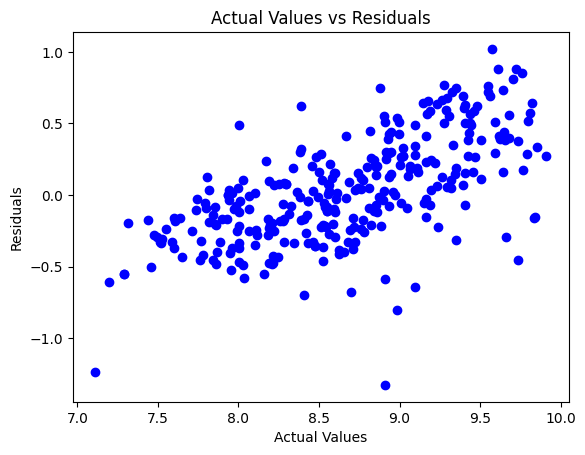

In [49]:
residuals = y_test - y_pred

# Create a scatter plot of the residuals
plt.scatter(y_test, residuals, color='blue')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Actual Values vs Residuals')

# Show the plot
plt.show()